In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

### Mô hình mình dùng là Sequential Model:
* Mô hình tuần tự (Sequential Model): Tuần tự (Sequential) có nghĩa là có thể tạo lớp mô hình (model layer) theo từng lớp. Trong mô hình này, có một đầu vào và đầu ra duy nhất, giống như phương thức ống dẫn (pipeline).

* Lớp (layer) là một đơn vị trong một mạng lưới học tập sâu (deep learning network). Mô hình gồm nhiều lớp trong mạng học sâu, trong đó, mỗi lớp gồm weights (trọng số),  activation (hàm kích hoạt), và bias (độ lệch).


Sơ đồ (diagram) mô hình CNN::

<img src="Jupyter_Images/CNN_Diagram.png">  

Sơ đồ (diagram) mô hình theo keras:
<img src="Jupyter_Images/convo.png"> 

In [4]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), activation = 'relu'))

## Conv2D:
* Conv2D - Lớp (layer) này thực hiện tích chập (convolution) trên mảng ảnh pixel hình ảnh đầu vàoo. Ảnh gif dưới đây là họa cách thức tích chập chạy duyệt. Về cơ bản, tích chập (Convolution) duyệt qua mảng pixel ma trận điểm ảnh ban đầu bằng một khối "bộ lọc" (filter) hoặc "trọng số" (weights) và nhân với giá trị điểm ảnh trên đường đi duyệt của nó. Trong quá trình thuấn luyện (training), cách thức duyệt và nhân này cho phép mạng học (network) nhận ra các đặt điểm của Nicolas Cage trong một hình ảnh.


<img src="Jupyter_Images/conv.gif">

### Các thông số của Conv2D: 
* Trong code, mình tạo đối tượng mô hình (model object) dưới dạng mô hình Keras tuần tự (sequential Keras model)
* Sau đó mình thêm một lớp chập (convolutional layer) lên nó
* Giá trị 32 có nghĩa là mình có 32 bộ lọc có kích thước 3x3
* Hình dạng đầu vào là hình ảnh kích thước 200x200 và 3 có nghĩa là hình ảnh 3 kênh màu rbg
* Hàm kích hoạt relu (relu activation function) là một hàm được sử dụng để đảm bảo các giá trị được chia tỷ lệ trong một phạm vi cụ thể.
<img src="Jupyter_Images/relu2.png">

* Vì vậy, nếu đầu vào của relu là giá trị <= 0, thì hàm sẽ tạo giá trị 0, nếu không, nếu đầu vào> 0 thì hàm sẽ xuất ra là giá trị như đầu vào
* Phương thức hoạt động của hàm chức năng ReLU được sử dụng để bắt chước cách bộ não của mình, cách mà tế bào thần kinh hoạt động. Khi  mạng thần kinh (neural networks) tính toán, một nút (node) trong một lớp (layer) có thể xuất ra một giá trị không nằm trong phạm vi cụ thể như 0 và 1. Chính vì thế, để đồng nhất, mình dùng hàm chức năng ReLU giúp buộc chuyển dòng số của mình thành một phạm vi đầu ra cụ thể mà mình mong muốn.


In [5]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

## Max Pooling:
* MaxPooling2D (hay là downsampling). Ma trận tích chập (convolved feature matrix ) mà mình đã tạo từ tích chập (convolution) từ phía trên chính là giá trị ma trận bộ lọc pixel hình ảnh * bộ filter matrix. Pooling duyệt vào ma trận này và lấy giá trị tối đa trong một vùng nhất định. 
<img src="Jupyter_Images/maxpool.png">

* Đây là mình khởi tạo lớp gộp (pooling layer) có kích thước 2x2 như trên


In [ ]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

## Hidden layers
<img src="Jupyter_Images/hiddenlayers.jpg">  

* Mình code thêm 2 lớp tích chập (layers of convolution) và max-pooling để giúp mạng của mình tìm thấy các đặt trưng đặt điểm nhận dạng hình ảnh tốt hơn . Ban đầu mình đã không thêm các lớp ẩn (hidden layers) bổ sung vào mạng và mình kiểm tra có độ chính xác kiểm tra chỉ 89%. Sau đó, mình kiểm trên thêm 2 lớp này và đạt độ chính xác kiểm tra 91% !

In [ ]:
classifier.add(Flatten())

## Flatten:
<img src="Jupyter_Images/flat.jpg">  

* Flatten - là lấy một ma trận hoặc tensor, sau đó làm phẳng nó thành một mảng các giá trị mảng 1 chiều rất dài. Lớp làm phẳng (flatten layer) thường được dùng trực tiếp theo sau lớp gộp (pooling layer) cuối cùng. Và làm phẳng là cần thiết bởi vì sau khi mình dùng tích chập (convolution) để mình cần tìm các đặt trưng của Nicolas Cage, mình cần làm phẳng các giá trị thành một mảng 1 chiều mới đưa nó vào lớp mạng  được. 

In [8]:
classifier.add(Dense(units = 64, activation = 'relu'))

## Dense:
<img src="Jupyter_Images/dens.jpg" width="400"> 
* Lớp mật độ (dense layer) là hàm tuyến tính (linear operation) trong đó mọi đầu vào được kết nối với mọi đầu ra theo trọng số (weight) (do đó có trọng số n_inputs * n_outputs weights). Nếu bạn nhìn vào phần cuối của sơ đồ tổng quan CNN đầu tiên của mình, đó là chổ mình dùng lớp mật độ (dense layer).

* Mình đặt units là 64. Đó là số lượng các nút (node) trong 1 lớp mật độ (dense layer). Giá trị của đơn vị luôn nằm giữa số lượng nút đầu vào có thể có

* Tiếp tục mình sử dụng hàm kích hoạt relu để tránh các giá trị âm và giữ các giá trị của mình trong một phạm vi nhất định.



In [ ]:
classifier.add(Dropout(0.5))

## Dropout: 
<img src="Jupyter_Images/drop1.jpeg"> 
<img src="Jupyter_Images/drop2.jpg"> 
* Dropout Là một kỹ thuật Regularization (sử dụng để giúp các mạng (networks) không bị overfit) thường được sử dụng trong Deep Learning và mạng lưới thần kinh.

* Overfitting là khi mạng lưới thần kinh (neural network) của mình thực hiện "quá tốt" dữ liệu đào tạo (training data) đầu vào nhưng rất tệ về dữ liệu thử nghiệm (test data). Điều này có nghĩa là mạng (network) không có tính khái quát, phổ dụng dữ liệu tốt, mà chỉ tập trung và đặt điểm cá biệt quá nhiều. Hay có nghĩa là nó phân loại hình ảnh mới mà nó chưa từng thấy trước đây không chính xác, 1 cách rất kém.

* Trong một mạng nơ ron (neural network), đạo hàm nhận được từ mỗi tham số, cho nó biết tham số đó nên thay đổi như thế nào để hàm loss function mất mát cuối được giảm, cho biết cách các đơn vị (units) khác đang hoạt động. Do đó, các đơn vị (units) có thể thay đổi theo cách khác để sửa chữa các lỗi sai từ các đơn vị (units) khác. Nhưng điều này có thể dẫn đến overfitting.  

* Vì vậy, về cơ bản mình tắt một số nơ-ron trong một lớp để chúng không tìm hiểu bất kỳ thông tin nào trong quá trình truyền ngược (backpropagation) với trọng số. Điều này cho phép các neurons hoạt động khác học tốt hơn và giảm lỗi


In [8]:
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))

## Lớp đầu ra (Output layer):

* Đây là lớp cuối cùng để đưa ra dự đoán. Mình chỉ chuyển đầu ra thành một đơn vị là 0 hoặc 1. 1 là hình ảnh chứa Nicolas Cage và 0 là hình ảnh không chứa Nicolas Cage

* Ở đây mình sử dụng một hàm kích hoạt khác là sigmoid. Sigmoid được sử dụng để "làm mềm" giá trị cuối cùng của mình trong khoảng từ 0 đến 1. Dưới đây là hình ảnh về hàm sigmoid trông giống như thế nào với phương trình.

* Nó hội tụ đầu ra của mình thành 0 hoặc 1. Đầu vào là  âm kết thúc gần bằng 0, đầu vào  dương kết thúc gần 1.


<img src="Jupyter_Images/sig.png">

In [ ]:
classifier.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Giải thích mô hình: 



### Gradient Descent: 

Gradient descent là quá trình giảm thiểu mất mát (loss function):
1. Bắt đầu tại một điểm trên đường cong loss function curve
2. Sau đó chọn một tỷ lệ học (learning rate) để xác định bao nhiêu bước để đi xuống (descend)
3. Rồi lấy đạo hàm tại thời điểm này, còn được gọi là 'gốc' hoặc độ dốc ( 'descent' hay gradient)
4. Mình nhân  độ dốc (descent ) với tỷ lệ học (learning rate value)
5. Tiếp, mình di chuyển điểm đầu  đến vị trí mới(có giá trị = descent * learning rate) trên đường cong cuve
6. Cuối cùng, lặp lại các bước trên  cho đến khi bằng số lần lặp được chỉ định, Hay là đến một số điều kiện dừng( như hội tụ (convergence) ở mức tối thiểu cục bộ (local minimia))

<img src="Jupyter_Images/gradientdescent-alpha0.05.gif">


### Stochastic Gradient Descent (SGD): 
<img src="Jupyter_Images/sgd.jpg">

* Mình sử dụng thuật toán tối ưu hóa Stochastic Gradient Descent để giảm thiểu nhỏ nhất có thể hàm mất mát (loss function)
* SGD là một phiên bản nâng cao của gradient descent thông thường.
* Gradient descent thường không hiệu quả đối với các bộ dữ liệu lớn do nó xem hết tất cả các tập đào tạo mẫu (training examples). Dưới đây là các phương trình của gradient descen.
<img src="Jupyter_Images/grad%20descent.png">

* Jtrain là chi phí hay là hàm mất mát (loss function), mình dùng squared error cho loss function 
* Sau đó, mình cứ lặp lại cho mỗi mẫu đào tạo và tính đạo hàm riêng của hàm mất mát (loss function) của mình

#### Vấn đề toán trong SGD: 
_SGD khá giống với  gradient descent, tuy nhiên, nó tính toán độ dốc (gradient) theo chỉ duy nhất một tập huấn luyện (training example) thay vì tất cả  training examples khi nó chạy lặp.
_Ví dụ mình có 20.000 tập mẫu, gradient descent sẽ duyệt qua tất cả 20.000 mẫu và sau đó thay đổi các tham số của mạng thần kinh (neural network) của chúng ta sau mỗi vòng lặp thông qua 20.000 mẫu
_Trong khi đó, SGD điều chỉnh độ dốc (gradient) từng chút một khi chúng ta lặp qua từng mẫu. Vì vậy, SGD xem xét duy nhất một mẫu  và sau đó điều chỉnh các tham số của mình khi nó đi qua từng mẫu. Dưới đây là toán học cho SGD:

<img src="Jupyter_Images/SGD.png">






### Binary_crossentropy: 

* Mạng lưới thần kinh (Neural networks) được đào tạo bằng cách giảm giá trị loss function theo thời gian
* Gía trị Loss functions để đo lường mức độ tồi tệ của mô hình so với từ dữ liệu thực tế
* Trong học máy / học sâu (machine learning/deep learning), có 2 loại hàm mất (loss functions) - 1 cái được sử dụng để phân lớp (classification) và  1 cái dùng để hồi quy (regression). Vì mình đang phân loại hình ảnh, nên mình dùng phân lớp.
* Mình chọn giá trị binary cross entropy để có   có đầu ra trong khoảng từ 0 đến 1.


<img src="Jupyter_Images/cross.png">

Trang [article](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23) sẽ hướng dẫn cách mình dùng cross entropy: 

* Khi để nhãn là  1 (y(i) = 1), nửa sau của hàm trên sẽ mất, trong khi nếu nhãn thực tế là 0 (y (i) = 0) thì nửa đầu bị bỏ đi.  Vì vậy, giá trị cross-entropy loss tăng khi tỉ lệ dự đoán phân kỳ ra khỏi nhãn thực tế. Khi đó tỉ lệ xác suất 0,010 khi nhãn quan sát thực tế là 1, là giá trị xấu và dẫn đến giá trị lỗi loss cao lên. Chính vì thế, một mô hình hoàn hảo sẽ có một mất log là 0.

Dưới đây là biểu đồ của hàm lỗi mất entropy::


<img src="Jupyter_Images/logloss.png">

* Lưu ý khi tỉ lệ dự đoán tiệm cận 1 trên biểu đồ, thì log lỗi giảm dần. Khi tỉ lệ dự đoán gần bằng 0, log lỗi lại nhanh chóng tăng lên.


### Metrics: 
* Mình dùng 'độ chính xác' làm chỉ số để đo hiệu suất của mô hình

In [ ]:
# CREATING OUR DATA: 
# Nicolas Cage images
import os 

path = "/Users/ngdum/Nicolas_Cage-master/Dataset/Images"

i = 0
      
for filename in os.listdir(path): 
    new_name = "Nic_Cage_" + str(i) + ".jpg"
    src = path + "/" + filename 
    new_name = path + "/" + new_name
        
    # rename all the files 
    os.rename(src, new_name) 
    i += 1
    


# Not Nicolas Cage images
import requests

path = "/Users/ngdum/Nicolas_Cage-master/Dataset/Random_images"

for i in range(207):
    url = "https://picsum.photos/200/200/?random"
    response = requests.get(url)
    if response.status_code == 200:
        file_name = 'not_nicolas_{}.jpg'.format(i)
        file_path = path + "/" + file_name
        with open(file_path, 'wb') as f:
            print("saving: " + file_name)
            f.write(response.content)

## Tạo tập dữ liệu data:  

#### Nicolas Cage: 
* Với bộ dữ liệu ảnh đầu vào, mình code chạy vòng lặp hết tất cả dữ liệu hình ảnh để đặt số thứ tự và tên lên ảnh
* Tới bước làm sạch dữ liệu, sau khi xóa thủ công những  ảnh có người khác hay vật ngoại vi hay hình ảnh không chính xác, mình đã  thu thập được 207 hình ảnh của Nicolas

#### Không phải Nicolas Cage: 
* Ban đầu, mình đã từng nghĩ có thể thực hiện mạng neural network chỉ cần phân loại một lớp (là chiều đúng). Hay chỉ cần lọc chọn những đặc điểm nào là của Nicolas Cage là đủ. Thế thì sau đó mạng neural network đã có thể tự nhận biết được các hình ảnh  Nicolas Cage.
* Nhưng cuối cùng, mình đã có 1 bài học rằng như vậy là chưa đủ, mà cần phải có các tập dữ liệu "đối nghịch" (không phải là Nicolas Cage) để giúp tìm hiểu hình ảnh của Nicolas Cage trông sẽ như thế nào và hình ảnh không phải của Nic Cage sẽ trông như thế nào. Do đó còn thu thập một bộ dữ liệu hình ảnh của các hình ảnh ngẫu nhiên không phải là Nicolas Cage.
* Mình đã code vào trang web picsum để tạo và lưu 207 hình ảnh ngẫu nhiên không phải Nicolas Cage
* Bước tiếp theo là tạo tập training set và tập test set 

### Tập Train và tập Test: 

* Mình đã quyết định phân chia tỉ lệ 70/30 cho tập dữ liệu. 70% dữ liệu được sử dụng làm dữ liệu đào tạo (training data, 145 hình ảnh)  và 30% được sử dụng làm dữ liệu thử nghiệm (test data, 62 hình ảnh), tất cả đều là hình ảnh là Nicolas Cage

* Mình đã tạo hai thư mục là thư mục  train và test  gồm "class0" và "class1". Class1 chứa hình ảnh về Nicolas Cage và Class0 chứa hình ảnh ngẫu nhiên.


In [4]:
# Image augmentations 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/Users/ngdum/Nicolas_Cage-master/Dataset/train/',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 shuffle = True, 
                                                 class_mode = "binary")

test_set = test_datagen.flow_from_directory('/Users/ngdum/Nicolas_Cage-master/Dataset/test/',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            shuffle = True,
                                            class_mode = "binary")
print(training_set.class_indices)

Found 290 images belonging to 2 classes.
Found 124 images belonging to 2 classes.
{'class0': 0, 'class1': 1}


## Phát sinh dữ liệu:

Ở bước này, mình tiền xử lý hình ảnh bằng phát sinh thêm dữ liệu từ dữ liệu đã có để đưa vào mạng neural network. Mình sử dụng lớp ImageDataGenerator bên trong Keras. Bằng cách dùng các phép thay đổi kích thước và cắt các hình ảnh cho đồng bộ. 

### Phát sinh dữ liệu (Data Augmentation) là gì?: 

* Dữ liệu tăng cường (Data Augmentation) tạo ra các mẫu đào tạo mới (training samples) của từ các mẫu gốc ban đầu. Bằng cách áp dụng các biến động ngẫu nhiên (random jitters, xoay ảnh, đảo ảnh...) và nhiễu loạn (perturbations, là là nhiểu ảnh sai khác). NHƯNG đồng thời đảm bảo rằng nhãn lớp của dữ liệu không bị thay đổi!
* Về cơ bản, nó tạo ra các mẫu đào tạo mới hơi "khác biệt" so với các mẫu đào tạo ban đầu

* Mục tiêu khi áp dụng tăng dữ liệu (data augmentation) là tăng tính tổng quát (generalizability) của mô hình. Mình sử dụng tính năng tăng cường (augmentation) vì ban đầu chỉ có có một lượng hình ảnh nhỏ như vậy nhưng nó sẽ giúp mô hình của mình khái quát hóa những hình ảnh mới từ Nicolas Cage.
<img src="Jupyter_Images/augment.png">

### Parameters 

* Tỉ lệ (rescale) - mình chia tỷ lệ hình ảnh theo tỷ lệ 1./255
* Phạm vi cắt (shear range) - mình mặc định một phạm vi chuẩn cho hình ảnh bị cắt hoặc dịch chuyển theo một hướng nhất định.
* Phạm vi thu phóng to nhỏ (zoom range) - mình chỉ định mặc định phạm vi được phóng to ngẫu nhiên 
* Lật ảnh (vertical_flip) - Lật ngẫu nhiên  đầu vào theo chiều ngang
* Kích thước ảnh đầu ra (target size) - kích thước của hình ảnh đầu vào đổi kích thước (resize) thành 200x200
* Kiểu phân lớp (class_mode) - đặt kiểu nhị phân vì chỉ có hai lớp để dự đoán Nicolas Cage trong một hình ảnh hoặc không




In [12]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 100)

Epoch 1/25
1000/1000 [==============================] - 913s 913ms/step - loss: 0.3476 - acc: 0.8502 - val_loss: 2.2280 - val_acc: 0.5000
Epoch 2/25
1000/1000 [==============================] - 907s 907ms/step - loss: 0.1354 - acc: 0.9564 - val_loss: 0.5738 - val_acc: 0.8629
Epoch 3/25
1000/1000 [==============================] - 904s 904ms/step - loss: 0.0675 - acc: 0.9825 - val_loss: 0.6880 - val_acc: 0.8710
Epoch 4/25
1000/1000 [==============================] - 910s 910ms/step - loss: 0.0170 - acc: 0.9956 - val_loss: 0.7560 - val_acc: 0.8710
Epoch 5/25
1000/1000 [==============================] - 952s 952ms/step - loss: 0.0454 - acc: 0.9893 - val_loss: 0.7865 - val_acc: 0.8710
Epoch 6/25
1000/1000 [==============================] - 908s 908ms/step - loss: 0.0158 - acc: 0.9959 - val_loss: 0.7694 - val_acc: 0.8952
Epoch 7/25
1000/1000 [==============================] - 908s 908ms/step - loss: 0.0833 - acc: 0.9851 - val_loss: 0.7052 - val_acc: 0.8790
Epoch 8/25
1000/1000 [============

## Ghép nối vào mô hình: 
* Mô hình của mình để có thể phân loại hình ảnh của Nicolas Cage như bạn thấy, vào lần thứ 25 (epoch), mình đã có thể đạt được độ chính xác test accuracy 99% và 91%.
* Trong quá trình tăng cường dữ liệu (augmentations) quá trình đào tạo, mình sử dụng hàm classifier.fit_generator. 

### Parameters:
* training_set - Mình đã hoàn thành trong đào tạo tập huấn luyện (training set) ImageDataGenerator để tăng cường bộ tập huấn luyện ảnh (training images)
* step_per_epoch - vòng lặp fit_generator sẽ vô hạn, vì thế mình cần chỉ định số lần mình muốn nó lặp
* epochs - xác định số lần thuật toán máy học sẽ hoạt động thông qua toàn bộ tập dữ liệu đào tạo (training dataset)
* test_set - Mình đã vượt qua tập kiểm tra (test set) ImageDataGenerator để tăng cường bộ tập ảnh kiểm tra (test images)
* val_steps - Tổng số bước (batches of samples)  sinh ra từ  test data trước khi dừng ở cuối mỗi epoch

### Khả năng "học": 
Mạng Neural networks học theo một quá trình gọi là backpropagation. Trong đó, các hàm .fit của Keras thực hiện quy trình này một cách tự động cho mình, vì vậy mình không phải viết mã bằng tay. Mình có thể tham khảo ở [neural networks demystified](https://youtu.be/UJwK6jAStmg?t=130) and [3Blue1Brown's back prop video](https://youtu.be/Ilg3gGewQ5U)

#### Forward Propagation:
* Mạng nơ-ron nhận mầu vào và thực hiện một quá trình gọi là lan truyền về phía trước (forward propagation). Để hiểu backpropagation, trước tiên mình cần hiểu quá trình  forward propagation.
* Trong đó, mỗi đường kết nối mỗi nơ-ron trong mạng neural network được gọi là khớp thần kinh và mỗi đường giữ một giá trị "trọng lượng" (weight):

<img src="Jupyter_Images/forward%20prop.png">

 1.  Đầu tiên,  forward propagation lấy một ma trận $X$ đầu vào và nhân các giá trị đó với ma trận trọng số lớp đầu tiên của mình (first layer) $W^1$. Trong trường hợp của mình, ma trận đầu vào là các giá trị pixel của hình ảnh của mình.

 2. Một khớp thần kinh là các đường (như trong hình) nối mỗi nơron trong mạng. Mỗi khớp thần kinh (đường) chứa một giá trị "độ ưu tiên, trọng số" (weight). Vì vậy, ma trận trọng số là tất cả các khớp thần kinh của lớp đầu tiên.  $Z^2$ (ma trận giá trị đầu vào của mình $X$ * $W^1$,  ma trận trọng sốcủa mình cho lớp đầu tiên + node bias $b$)
 
 3. là (ma trận đầu vào $X$ nhân ma trận trọng số $W^1$ + $b$ bias b) được truyền vào một hàm kích hoạt như sigmoid hoặc relu.  $a^2$ đại diện cho tất cả các giá trị trong lớp ẩn của nó.
 
 4. Bây giờ $a^2$ được chuyển tiếp và nhân với nhóm trọng số tiếp theo $W^2$  để cung cấp cho mình giá trị của $Z^3$ 
 5. Mình thực hiện quá trình tương tự như mình đã làm trong lớp đầu tiên. mình chuyển $Z^3$ vào hàm kích hoạt để có được giá trị đầu ra dự đoán của mình


Một lớp ẩn (hidden layer) trên chỉ chứa 3 nút nhưng việc truyền bá về phía trước (forward propagation) hoạt động giống trên các mạng thần kinh (neural networks) lớn hơn và phức tạp hơn. Về cơ bản, lớp sau cung cấp các giá trị đầu vào của lớp trước đó, chuyển tiếp mỗi lần và áp dụng phép nhân ma trận giữa ma trận đầu vào và trọng số cộng với độ lệch (bias). Sau đó, lớp đó áp dụng một hàm kích hoạt để chuyển các giá trị của nó vào phạm vi mong muốn (khoảng hiệu chỉnh). Tuy nhiên, bắt đầu bằng forward propagation lại sẽ tạo ra các giá trị dự đoán tồi tệ. Trong quá trình huấn luyện của mình, bạn có thể thấy mình chạy mẫu 1 ví dụ trong bộ test thì độ chính xác trong epoch đầu tiên là 50%. Back prop sẽ giúp điều chỉnh các giá trị trọng số weight  trong mạng của mình mới thực sự học hỏi.

#### Back Propagation:

* Neural networks học bằng cách giảm thiểu 'chi phí' hoặc 'loss' function. Khi mạng neural network có đầu ra đưa ra một dự đoán sau khi lan truyền về phía trước (forward propagation), mình kiểm xem dự đoán này sai như thế nào bằng cách nhìn vàohàm chi phí (cost function). Hàm chi phí của mình (cost function) là một hàm "log loss function". Vì vậy, mình giảm thiểu hàm này bằng cách sử dụng  gradient descent.

* Trong quá trình gradient descent, mình lấy đạo hàm tại điểm trên đường cong. Đạo hàm này cho biết độ dốc của đường tiếp tuyến. Sau đó, mình  di chuyển điểm trên đường cong mất đi theo hướng dốc âm. Về cơ bản, mục đích là muốn hướng điểm trên đường mất (loss curve) về độ dốc âm vì mình muốn giảm thiểu hàm chi phí. Nhưng làm thế nào để chúng ta có được đạo hàm này?

ở mức cao ở back propagation là quá trình xác định những thay đổi đối với các trọng số và sai lệch trong mạng, sẽ là hiệu quả nhất và nhanh chóng để giảm cho hàm chi phí (cost function), dựa trên chỉ cần một ví dụ đào tạo duy nhất (single training example). Back propagation có thể xem là đệ quy vì có nghĩa là độ dốc của lớp đầu ra phụ thuộc vào độ dốc của lớp trước đó, rồi lại phụ thuộc vào độ dốc của lớp trước và cứ như vậy trên toàn mạng:
<img src="Jupyter_Images/back%20prop%201.png">

* C0 đại diện cho giá trị chi phí, $C_0 = (a^L -y)^2$ . Hàm chi phí của chúng tôi là log loss
* $z^L$ = (ma trận trọng số $W^L$* các giá trị lớp trước $a^{L-1}$  + độ lệch bias $b^L$)
* $a^L$ là $Z^L$ được truyền vào hàm kích hoạt



####  Toán học: 
Với lan truyền ngược, cần 3 phương trình. Mình sử dụng các hàm phát sinh  khi thực hiện truyền ngược (back propagation) vì mình muốn xem các phần trọng điểm trong mạng  ảnh hưởng đến  cost function, trong khi mấy cái khác không đổi. Cũng như xem các trọng số (weights), bias, các lớp trước, tất cả đều riêng lẻ và ảnh hưởng đến hàm chi phí như thế nào (cost function).

1. $\frac{\partial C}{\partial W^L} = \frac{\partial C}{\partial a^L} \frac{\partial a^L}{\partial Z^L} \frac{\partial Z^L}{\partial W^L}$
* Với back propagation, mình cần tính toán độ nhạy (sensitive) của hàm chi phí ( cost function) đối với những thay đổi nhỏ trong trọng lượng: $W^L$. So $\frac{\partial C}{\partial W^L}$ = đạo hàm của hàm chi phí đối với trọng số

* Việc chỉnh trọng sốnày gây ra ảnh hưởng cho tất cả các thành phần khác trong mạng. Vì vậy, để tính toán, chúng tôi sử dụng quy tắc chuỗi từ phép tính.
    
    * $\frac{\partial Z^L}{\partial W^L} = a^{L-1}$ = Đạo hàm của $z^L$ với trọng số 
    * $\frac{\partial a^L}{\partial Z^L} = \sigma'(Z^L)$ =  Đạo hàm của hàm kích hoạt (activation function)
    * $\frac{\partial C_0}{\partial a^L} = 2(a^L - y)$ = Đạo hàm của hàm chi phí (cost function)
    * Vì vậy khi nhóm lại hết, đạo hàm của một tập  training example  của $W^L$  là $\frac{\partial C}{\partial W^L} = a^{L-1}\sigma'(Z^L)2(a^L - y)$

    * Nhưng đó chỉ là với một tập training example. Đạo hàm của cost function đầy đủ đòi hỏi phải tính trung bình trên tất cả các  training examples. 

<img src="Jupyter_Images/deriv%202.png">

2. Tuy nhiên, đó chỉ là một đạo hàm riêng mà mình cần. Bây giờ mình cần đạo hàm riêng của chi phí (cost) liên quan đến giá trị sai lệch (bias)!:. 
    * $\frac{\partial C}{\partial b^L} = \frac{\partial Z^L}{\partial b^L}\frac{\partial a^L}{\partial Z^L}\frac{\partial C}{\partial a^L}$
    * $\frac{\partial C}{\partial b^L}  = 1*\sigma'(Z^L)2(a^L - y)$

3. Cuối cùng, chúng ta cần đạo hàm riêng đối với lớp trước:
    * $\frac{\partial C}{\partial a^{L-1}} = \frac{\partial Z^L}{\partial a^{L-1}}\frac{\partial a^L}{\partial Z^L}\frac{\partial C}{\partial a^L}$
    * $\frac{\partial C}{\partial a^{L-1}}  = w^L\sigma'(Z^L)2(a^L - y)$

#### Putting it all together: 
* Các phương trình trên được đơn giản hóa để có một nơron (neuron) trong mỗi lớp của một mạng đơn giản (simple network). Đây là cách chuẩn hơn thể kết hợp các phương trình cho việc tính toán đạo hàm back propagation:
<img src="Jupyter_Images/back%20prop%202.png">

Thực chất là cùng một phương trình như trên, nhưng cải tiến hơn một chút là xử lý một mạng có nhiều hơn một nơron trong mỗi lớp, nơi mà các chỉ số jk lặp lại.
<img src="Jupyter_Images/final%20backprop.png">
Đây là phương trình cuối cùng để cho back propagation. Như bạn có thể thấy, nó thay đổi một chút so với phương trình trước của mình.
* $\frac{\partial C_0}{\partial a_k^{L-1}}$ là đạo hàm của hàm chi phí (cost function ) (độ dốc (slope) của đường tiếp tuyến (tangent line) trên hàm chi phí) đối với lớp kích hoạt trước đó.

* Lấy tổng trên mọi lớp trong mạng
* $\frac{\partial Z_j^L}{\partial a_k^{L-1}}$ là đạo hàm của tổng trọng số của ((trọng số $W^L$ * các lớp trước $a^{L-1}$) + độ lệch bias) đối với lớp kích hoạt trước đó
* $\frac{\partial a^L}{\partial z_j^L}$ là đạo hàm của lớp kích hoạt hiện tại đối với tổng trọng số của  ((Trọng số (weights) $W^L$  * các lớp trước $a^{L-1}$) ) + độ lệch bias)

* $\frac{\partial C_0}{\partial a_j^L}$ là đạo hàm của hàm chi phí đối với lớp kích hoạt hiện tại

Mình  thoát khỏi ${\partial W_{jk}^L}$ đạo hàm liên quan với trọng số và  chuyển đổi nó thành ${\partial a_k^{L-1}}$ . Đó là đạo hàm của hàm chi phí (cost function) kích hoạt trong lớp L-1. Lý do chúng tôi làm điều này là do neuron ở $a_k^{L-1}$  có ảnh hưởng đến tất cả các neuron  trong lớp $a^L$ Dưới đây là một hình ảnh hữu ích mô tả điều này:

<img src="Jupyter_Images/influence%20.png">

Is it necessary to understand the gross looking calculus to be able to get our network to perform well? Thankfully not since Keras does this process automatically for us but I thought it was interesting to go down the math rabbit hole. Back propagation is super confusing and to be completely honest I still sometimes get lost when I look at all the calculus. Many times I still have to go review it and watch helpful youtube videos to try and polish my understanding. 

Cần phải hiểu các phép toán này để mạng mình để thực hiện tốt? Rất may không phải code lại nhiều về toán, vì Keras thực hiện quá trình này tự động cho mình. Nhưng mình nghĩ thật thú vị khi đi xuống hố toán học. Back propagation rất là khó hiểu và thành thật mà nói, đôi khi mình vẫn bị lạc khi nhìn vào tất cả các phép tính. Nhiều lần mình vẫn phải đi xem lại và xem các video youtube để thử và rèn lại sự hiểu biết .

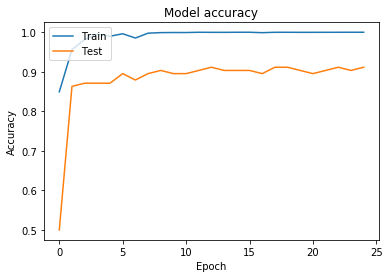

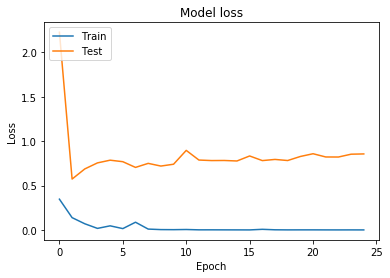

In [16]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Độ chính xác (Accuracy) và độ lỗi (Loss):
* This code lets us visualize our model accuracy and model loss. The code is from [here](https://keras.io/visualization/) explained in the Keras documentation 
* As we can see our test and train accuracy are pretty close near the 25th epoch and the same goes for our model loss! 
* We ended our training with a 91% test accuracy and a 99% train accuracy which is pretty good.

_Đoạn code trên cho phép mình hình dung độ chính xác mô hình và độ mất mát (loss) của mô hình. code được giải thích từ đây trong tài liệu của Keras [here](https://keras.io/visualization/)

_Như mình có thể thấy độ chính xác của bộ test và bộ train khá gần ở epoch thứ 25 và điều tương tự cũng xảy ra đối với model loss !
Mình kết thúc tập đào tạo  với độ chính xác (accuracy) tập test là 91% và độ chính xác tập đào tạo  train 99%, khá tốt.


This is Nicolas Cage:


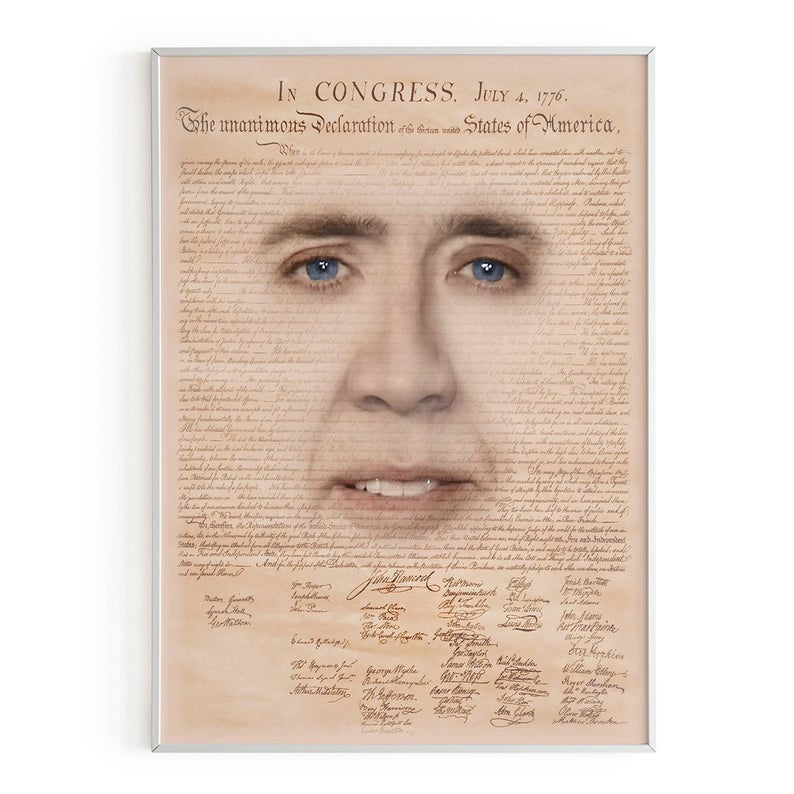





This is Nicolas Cage:


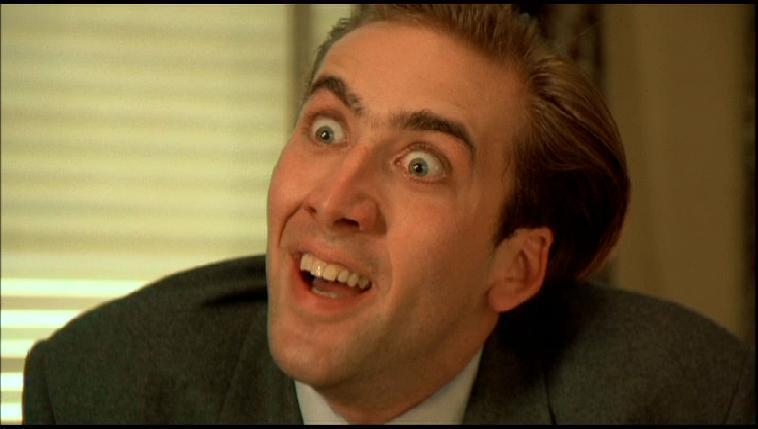





This is not Nicolas Cage:


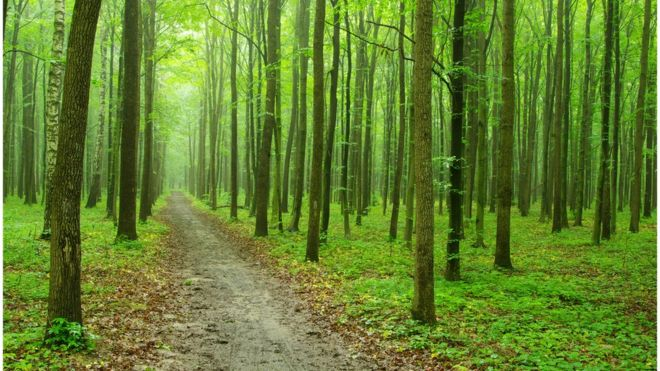





This is Nicolas Cage:


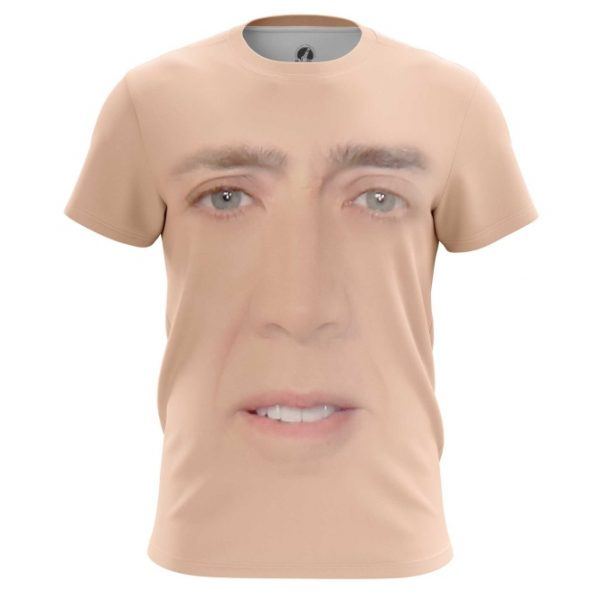





This is Nicolas Cage:


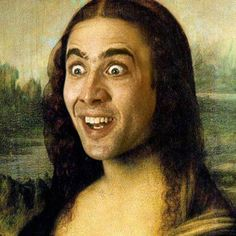





This is not Nicolas Cage:


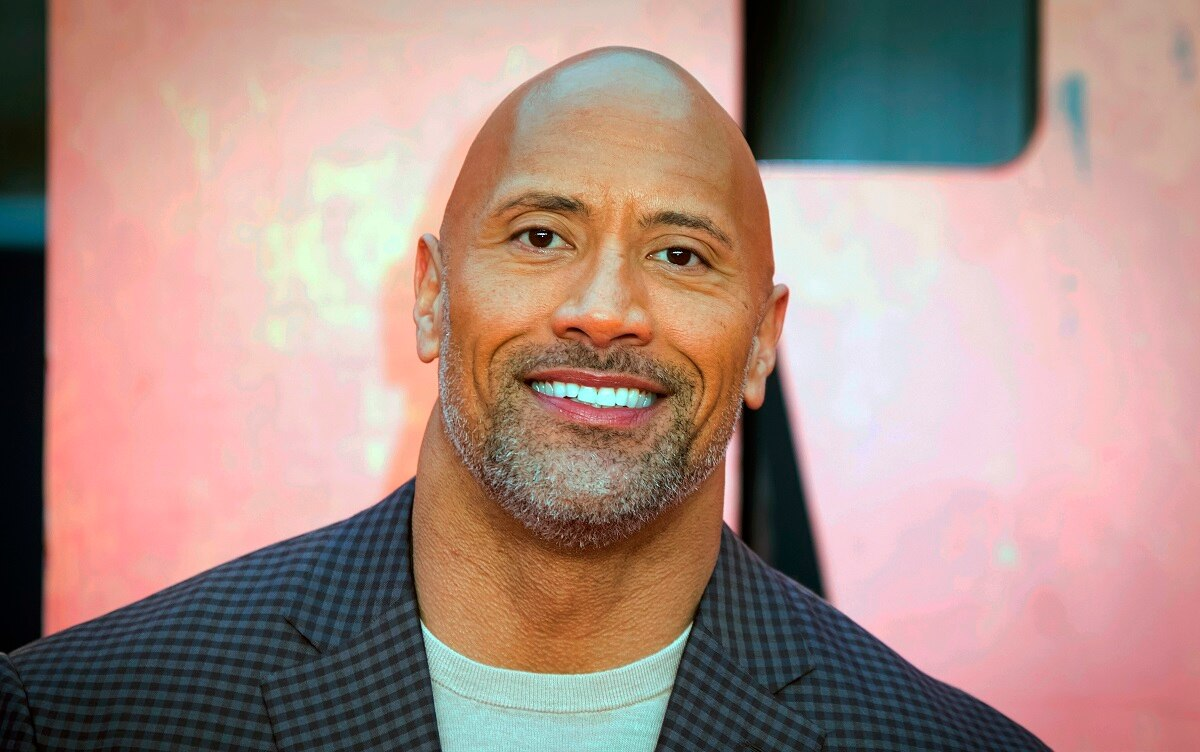





This is Nicolas Cage:


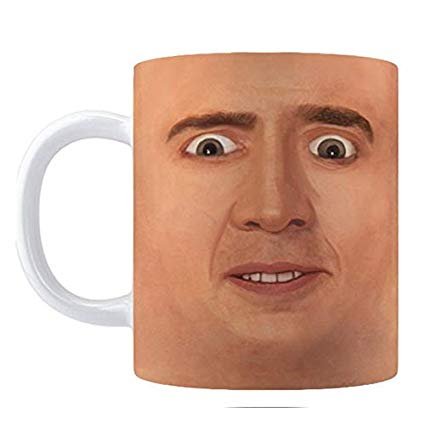





This is not Nicolas Cage:


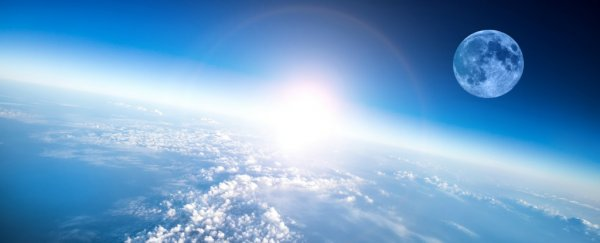





This is Nicolas Cage:


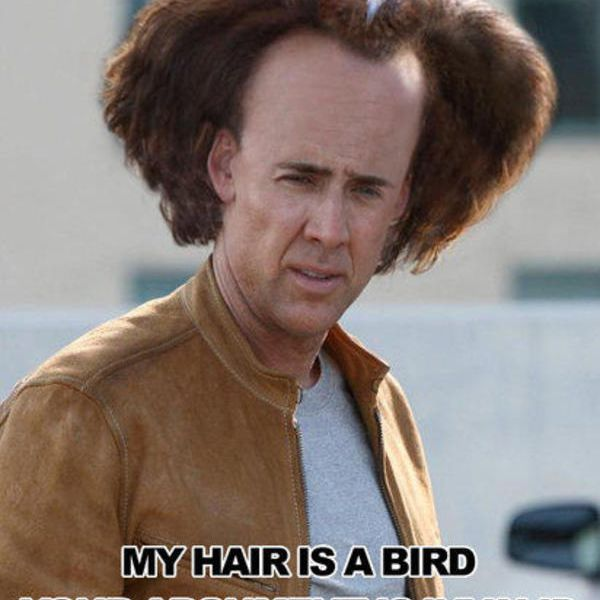





This is Nicolas Cage:


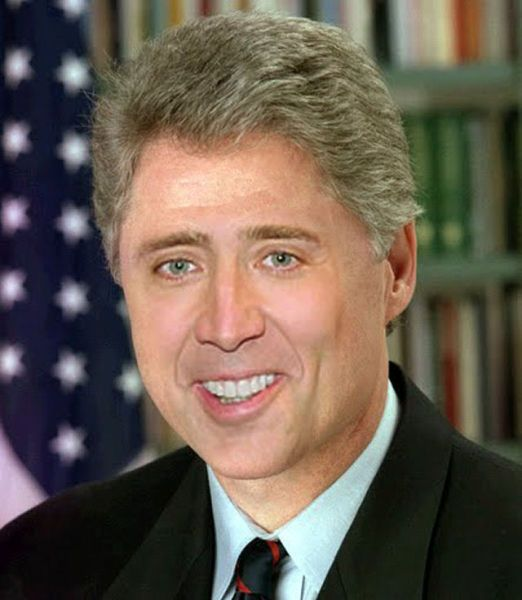





This is Nicolas Cage:


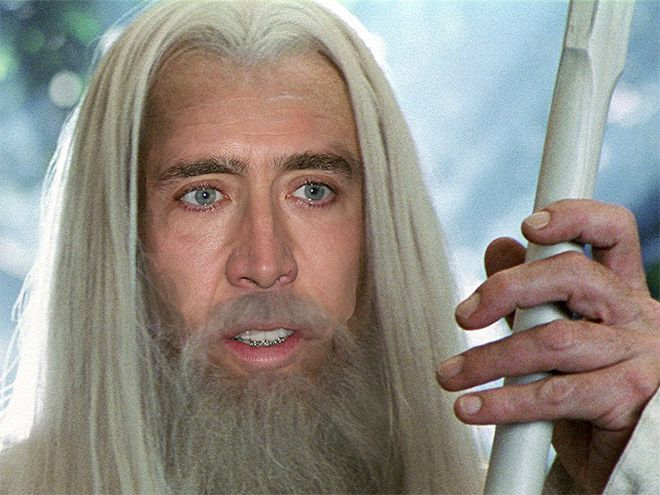

In [47]:
from keras.preprocessing import image
import numpy as np 
from IPython.display import Image
import os

predict_path = '/Users/ginja/Desktop/Code/Nic_Cage/Predict'
for file in os.listdir(predict_path):
    if not file.startswith('.'): # to avoid .ds_store files on my mac
        file = predict_path + "/" + file
        
        test_image = image.load_img(file, target_size = (200, 200))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        
        result = classifier.predict(test_image)
        training_set.class_indices
        if result[0][0] == 1:
            prediction = 'This is Nicolas Cage:'
        else:
            prediction = 'This is not Nicolas Cage:'

        print(prediction)
        img = Image(file, width = "400", height = "400")
        display(img)
        print("\n")
        print("\n")